In [11]:
from activation_functions import *
from loss_functions import *
from utils import *
from MLP import *
from train import *
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

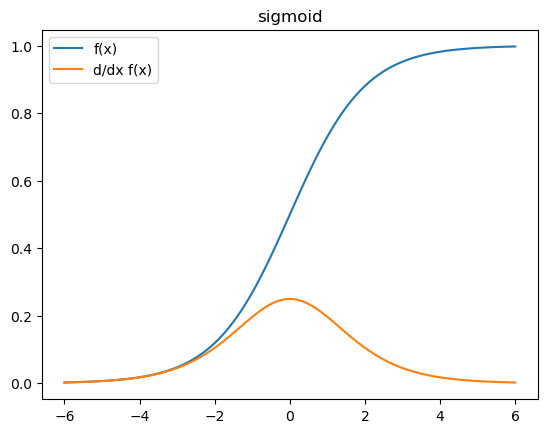

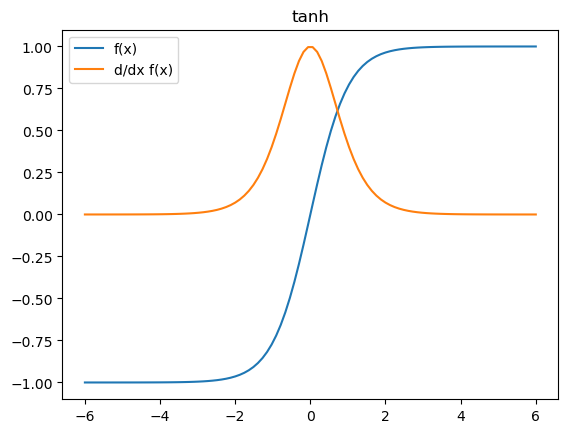

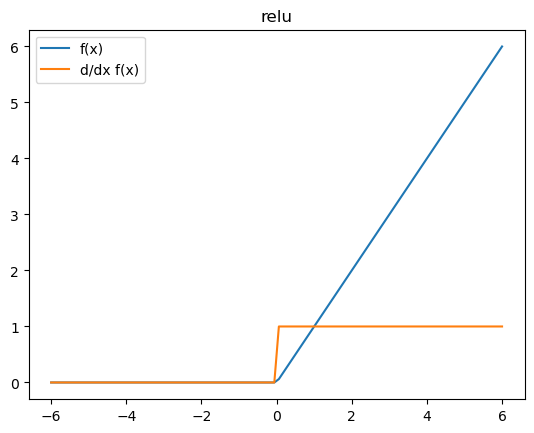

In [6]:
x = np.linspace(-6, 6, 100)
for fn, name in zip([Sigmoid(), TanH(), ReLU()], ["sigmoid", "tanh", "relu"]):
    plot_fn(x, fn, name)

In [7]:
def gradient_descent(train_data, test_data, model, loss_func, epochs, learning_rate):
    gradient = GradientDescent()
    valid_losses = gradient.evaluate(test_data, model, loss_func)
    print("Initial Validation: " + str(np.mean(valid_losses)))
    
    train_loss_arr = []
    valid_loss_arr = []
    
    for epoch in range(epochs):
        train_losses = gradient.update(train_data, model, loss_func, learning_rate)
        valid_losses = gradient.evaluate(test_data, model, loss_func)
        
        print("Epoch " + str(epoch) + ": " + str(np.mean(train_losses)) + " Train Loss, " + str(np.mean(valid_losses)) + " Valid Loss") 
        
        train_loss_arr.append(np.mean(train_losses))
        valid_loss_arr.append(np.mean(valid_losses))
        
    return train_loss_arr, valid_loss_arr

In [12]:
# Generating toy data
def normalize(data, mu, std):
    return (data - mu) / std

X, y = dt.make_regression(n_samples = 1000, n_features = 20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)

X_train = normalize(X_train, X_mean, X_std)
X_test = normalize(X_test, X_mean, X_std)
y_train = normalize(y_train, y_mean, y_std)
y_test = normalize(y_test, y_mean, y_std)

train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))

In [13]:
# Initialize and train the model

train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))
input_size, output_size = train_data[0][0].shape[0], 1
hidden_size = 8
activation_func = Sigmoid(); loss_func = MSE(); epochs = 200; lr = 1e-3

model = MLP(input_size, hidden_size, output_size, activation_func)
train_loss_arr, valid_loss_arr = gradient_descent(train_data, test_data, model, loss_func=loss_func, epochs=epochs, learning_rate=lr)

TypeError: GradientDescent.evaluate() takes 3 positional arguments but 4 were given